<a href="https://colab.research.google.com/github/AlbertoTavares13/PUC_BI/blob/main/Analise_reclamacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Disciplina BI 2, Tópicos avançados

# Prof.: Leonardo Mendoza
# Alunos: Alberto Tavares e Robson Guimarães

# Criação de nuvens de palavras (por Estado, Serviço e Empresa) a partir de base de dados de reclamações.

### Importa bibliotecas

In [ ]:
import nltk
import pandas as pd
import os
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

%matplotlib inline

### Leitura da base de reclamações

In [ ]:
data = pd.read_csv('base reclamações (2).csv',encoding='windows-1252',sep =';')
# verificação visual das 5 ultimas linhas
data.tail()

Regiao   ...        faixa etarea
42302  Sudeste  ...       Nao Informada
42303  Sudeste  ...  entre 31 a 40 anos
42304  Sudeste  ...  entre 21 a 30 anos
42305  Sudeste  ...       Nao Informada
42306  Sudeste  ...  entre 31 a 40 anos

[5 rows x 8 columns]

### Quantidade de linhas e de colunas do dataframe lido

In [ ]:
data.shape

(42307, 8)

### Localização das colunas com valores "null"

In [ ]:
data.isnull().sum()

Regiao              0
estado              0
empresa             1
subsidiaria      6530
area             5329
serviço             0
problema         8936
faixa etarea        0
dtype: int64

# Verificar as reclamações por estado

In [ ]:
data.groupby("estado").size().sort_values(ascending=False)

estado
SP    8127
GO    7764
MS    4723
RN    4073
MT    3972
MG    3460
PI    2153
RO    2057
SC    1955
CE    1766
ES     828
TO     567
PA     341
PB     302
MA     126
RS      90
PE       3
dtype: int64

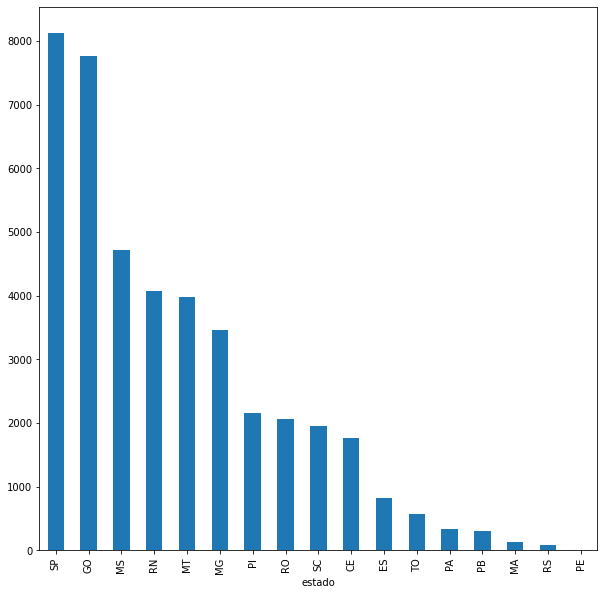

In [ ]:
data.groupby("estado").size().sort_values(ascending=False)[:].plot(figsize=(10,10),kind='bar')

# Nuvem de palavras com as reclamações por Estado

In [ ]:
# Criação de dataframe com a coluna Estado
df_estado = pd.DataFrame()
df_estado['estado'] = data['estado']

In [ ]:
# Criação de uma string única com todas as ocorrências dos estados
string_estados = " ".join(text for text in df_estado.estado)

In [ ]:
# Importação da imagem a ser usada na Nuvem de Palavras
Diretorio_arquivo = "/content/BandeiraBrasil.png"
Estado_mask = np.array(Image.open(Diretorio_arquivo))

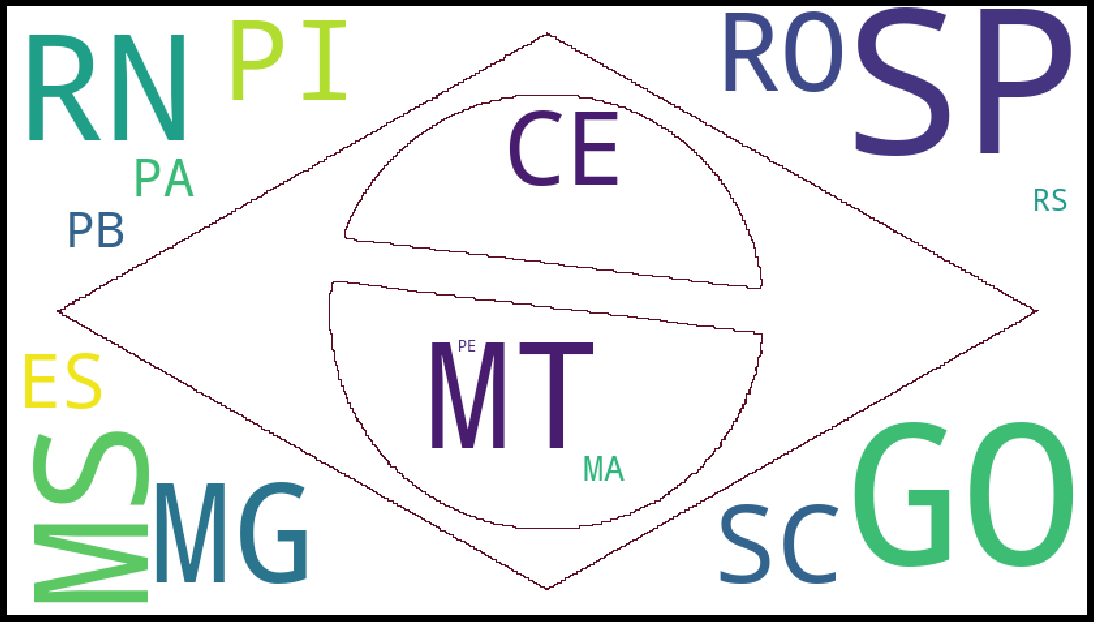

In [ ]:
# Geração da Nuvem de Palavras por Estado
wordcloud_estados = WordCloud(background_color="white",collocations=False,
                              #colormap="Oranges_r",
                       #       colormap="RdYlGn",
                              width = 4000,
                              height = 3000,
                              max_font_size=1000,
                              max_words=400
                               ,mask=Estado_mask
                             ,contour_color='#5d0f24'
                             ,contour_width=1
                              ).generate(string_estados)
plt.figure(figsize = (15,10),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_estados, interpolation='none')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Estados_wordcloud.png")
plt.show()

# Verificar as reclamações por serviço

In [ ]:
data.groupby("serviço").size().sort_values(ascending=False)

serviço
Telefone ( Convencional, Celular, Interfone, Etc. )                5149
Telefonia Celular                                                  3037
Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação )    2713
Banco comercial                                                    2313
Cartão de Crédito                                                  2274
                                                                   ... 
Charutaria ( Cigarro, Tabaco, Cachimbo, Etc. )                        1
Embalagem                                                             1
Farináceos (fubá, polvilho, etc.)                                     1
Profissional Liberal - Veterinário                                    1
Radiochamada / Pager                                                  1
Length: 193, dtype: int64

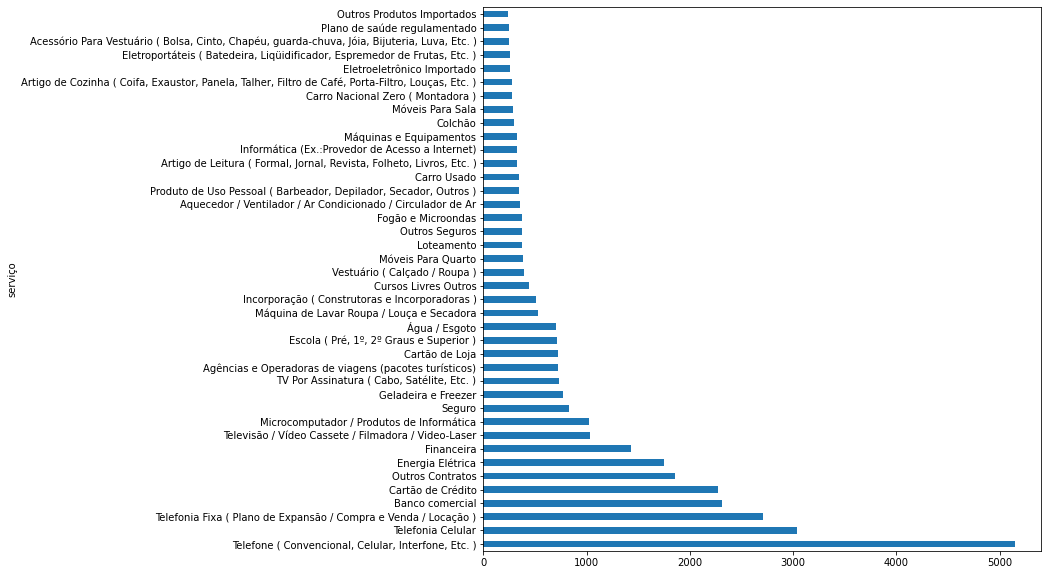

In [ ]:
data.groupby("serviço").size().sort_values(ascending=False)[:40].plot(figsize=(10,10),kind='barh')

In [ ]:
# Criação de dataframe com a coluna Serviço
df_serviço = pd.DataFrame()
df_serviço['serviço'] = data['serviço']

In [ ]:
dicionario = {' s/a':'',' s.a':'',' ltda':'',' CEF':'',\
              ' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":'',\
              '_sa$':'','\.':'','/':' '}
df_serviço = df_serviço.replace({'serviço': dicionario},regex=True)

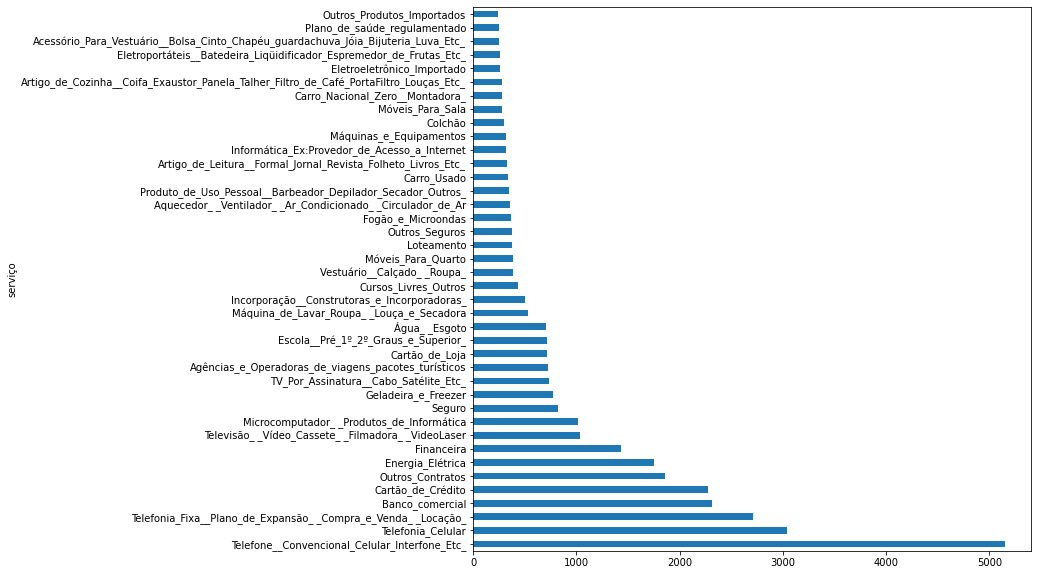

In [ ]:
df_serviço.groupby("serviço").size().sort_values(ascending=False)[:40].plot(figsize=(10,10),kind='barh')

In [ ]:
# Criação de uma string única com todas as ocorrências dos estados
string_serviços = " ".join(text for text in df_serviço.serviço)

In [ ]:
# Importação da imagem a ser usada na Nuvem de Palavras
Diretorio_arquivo = "/content/BandeiraBrasil.png"
Serviço_mask = np.array(Image.open(Diretorio_arquivo))

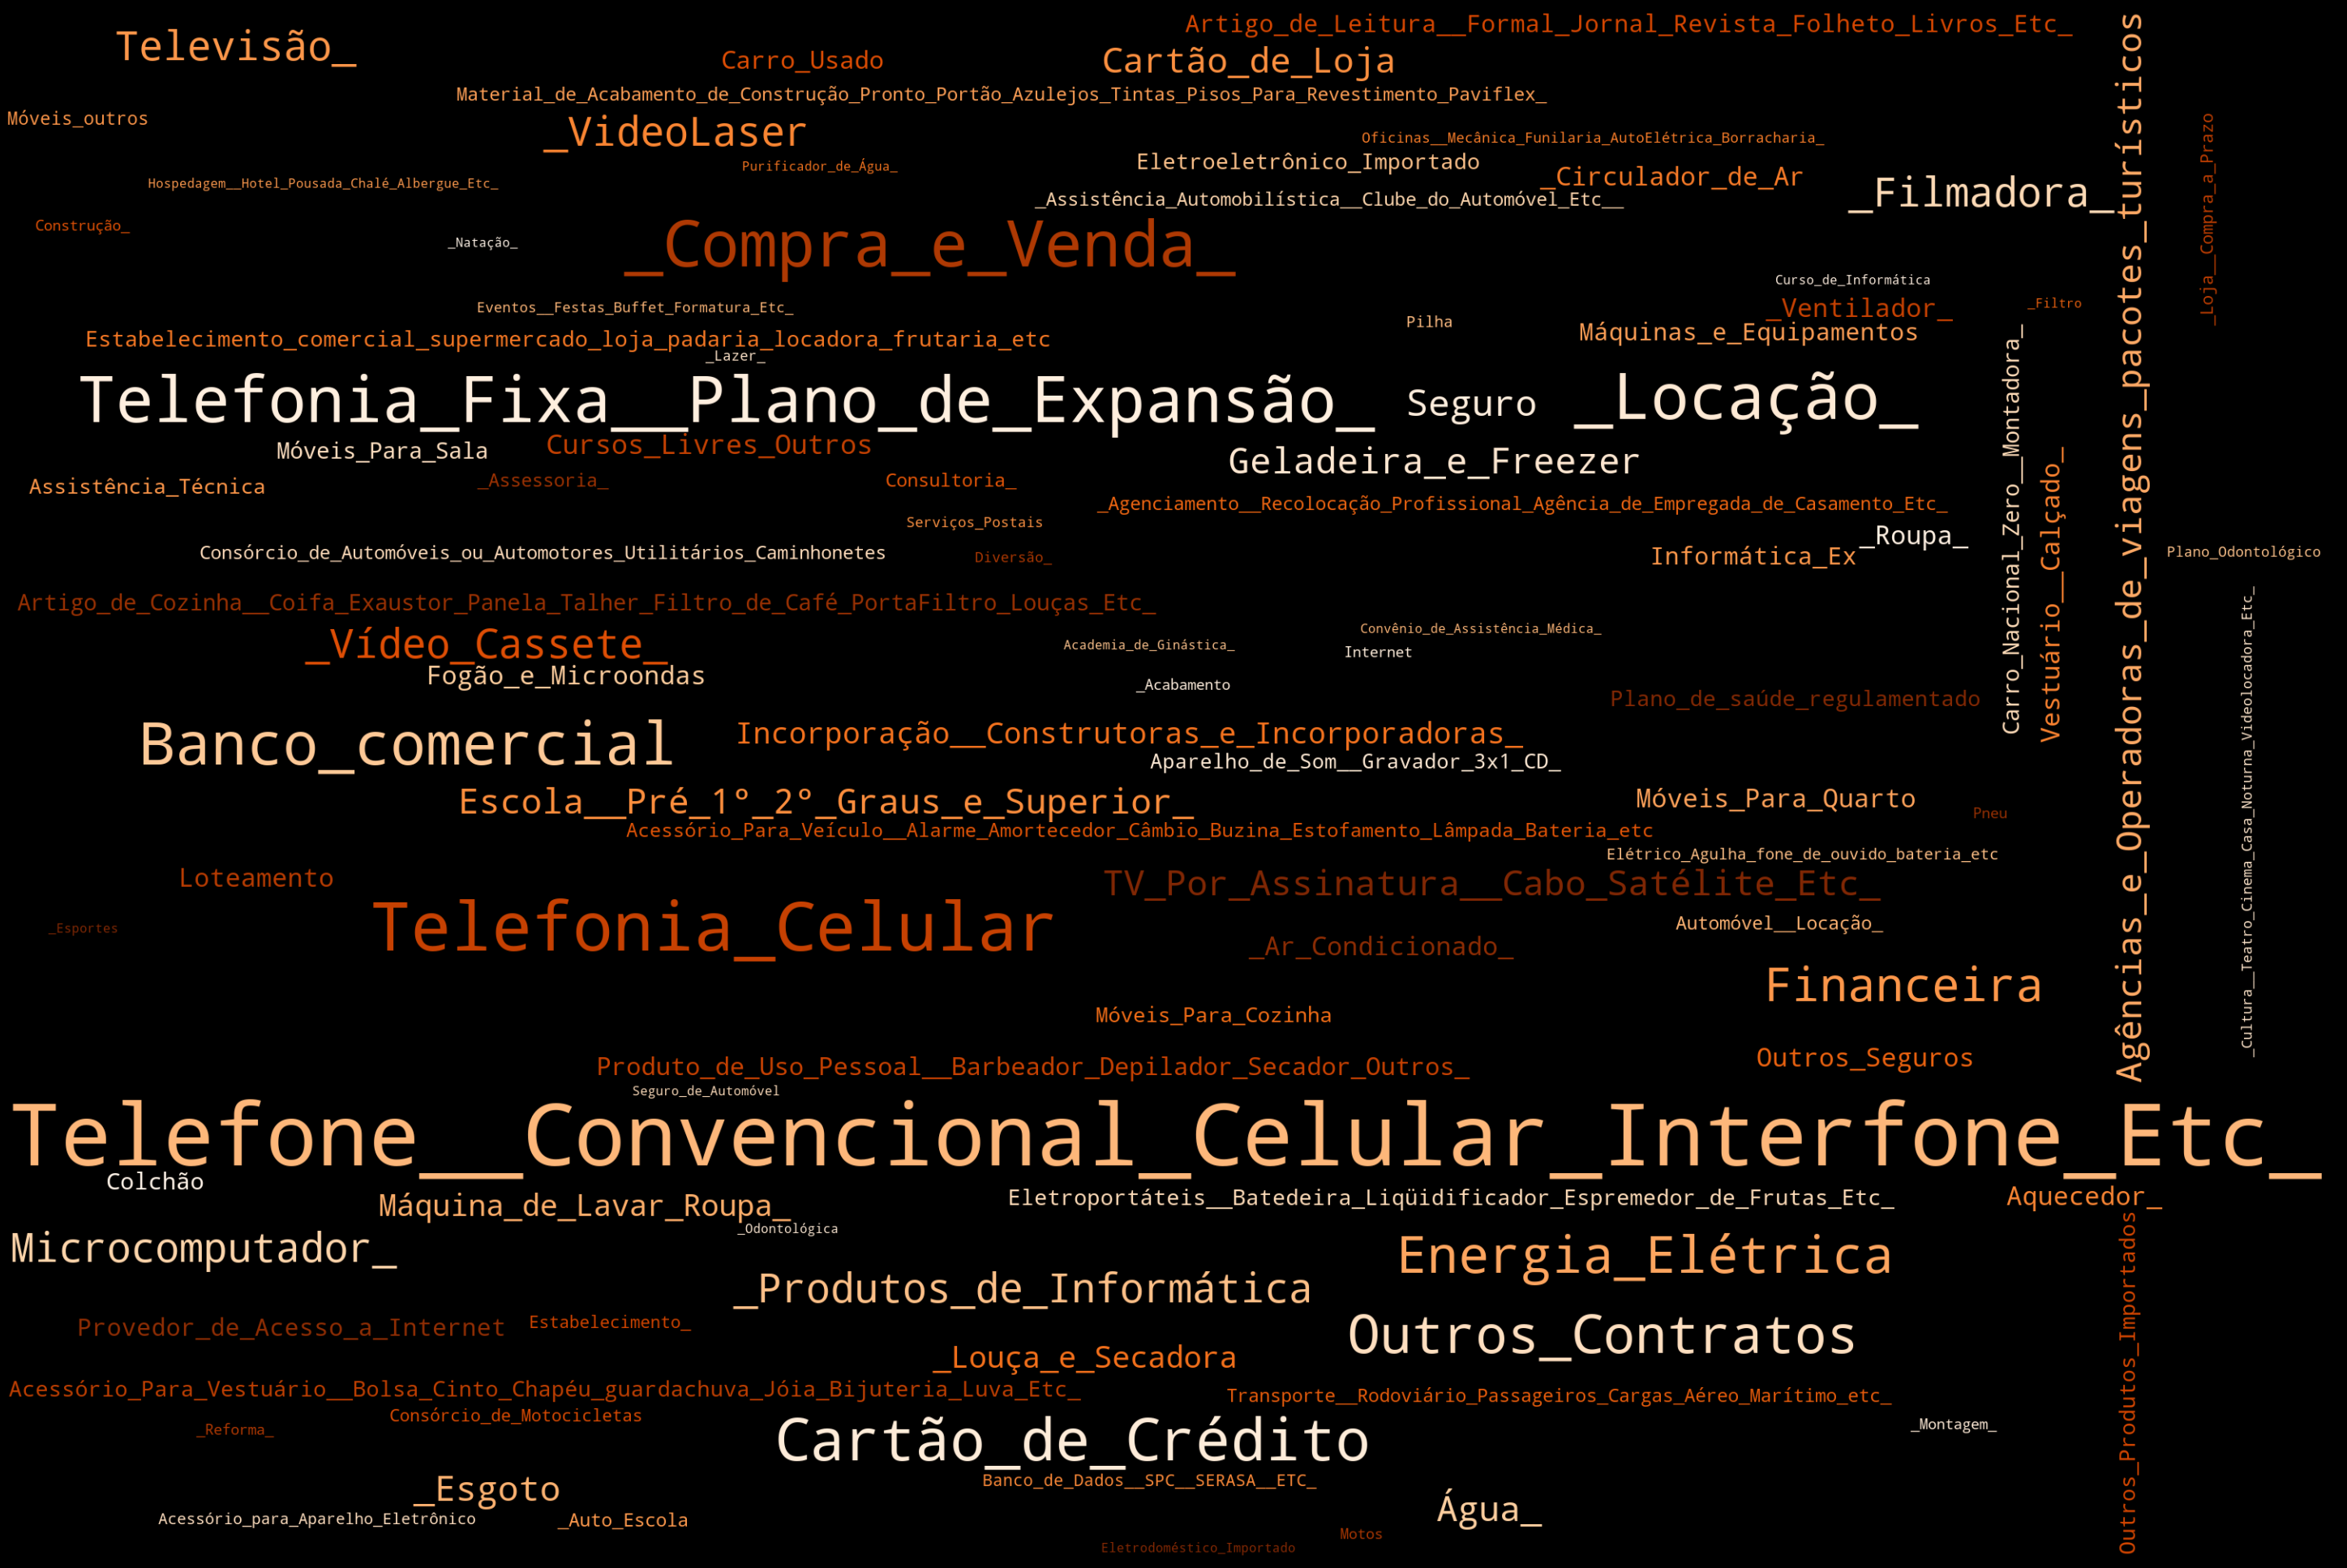

In [ ]:
# Geração da Nuvem de Palavras por Serviço
wordcloud_serviços = WordCloud(background_color="black",collocations=False,
                              colormap="Oranges_r",
                              width = 3000,
                              height = 2000,
                              max_font_size=1000,
                              max_words=100
                             ).generate(string_serviços)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_serviços, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Serviço_wordcloud_100.png")
plt.show()

# Tratamento das empresas

In [ ]:
data.groupby("empresa").size().sort_values(ascending=False)

empresa
TELEFONICA BRASIL S/A                                 846
CLARO S/A                                             752
ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO     480
TIM CELULAR S/A                                       461
CAIXA ECONOMICA FEDERAL                               419
                                                     ... 
MARFRAN VIAGENS E TURISMO LTDA                          1
MAREZIA COMÉRCIO DE COMBUSTÍVEIS LTDA                   1
MARES - MAPFRE RISCOS ESPECIAIS SEGURADORA S.A.         1
MARE MANSA COMERCIO DE MOVEIS E ELETROS LTDA            1
\tBROTHER INTERNATIONAL CORPORATION DO BRASIL LTDA      1
Length: 11214, dtype: int64

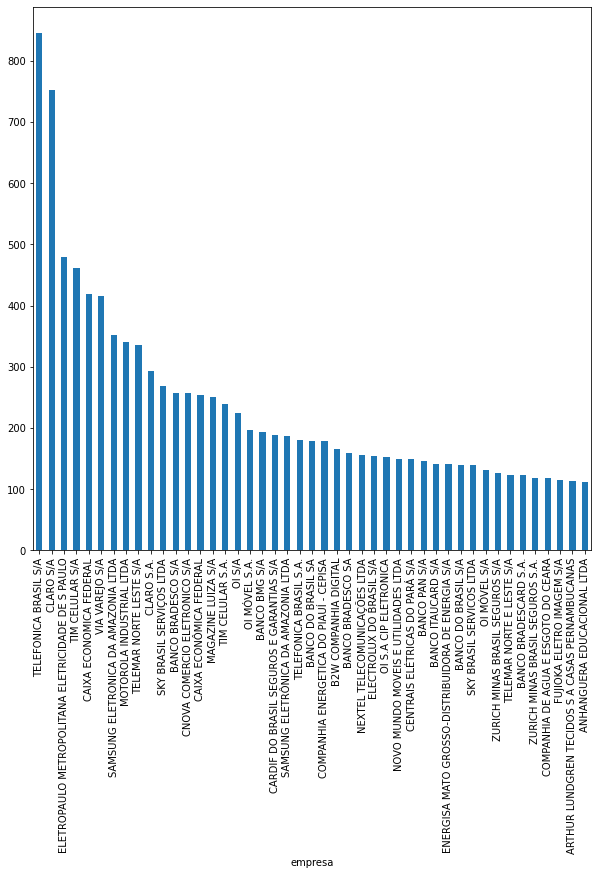

In [ ]:
data.groupby("empresa").size().sort_values(ascending=False)[:45].plot(figsize=(10,10),kind='bar')

In [ ]:
# Criação de dataframe com a coluna Estado
df_empresa = pd.DataFrame()
df_empresa['empresa'] = data['empresa'].str.lower()

### Verificação se há algum "null"

In [ ]:
df_empresa.isnull().sum()

empresa    1
dtype: int64

### Remoção dos "nulls" encontrados

In [ ]:
df_empresa.dropna(inplace=True)
df_empresa.isnull().sum()

empresa    0
dtype: int64

In [ ]:
# Ajuste das descrições das empresas
dicionario = {' s/a':'',' s.a':'',' ltda':'',' CEF':'',\
              ' ':'_','/':'',',':'','\(':'','\)':'',"-":'','\.':'',r"^\t":'',\
              '_sa$':'','\.':'','/':' '}
df_empresa = df_empresa.replace({'empresa': dicionario},regex=True)

In [ ]:
df_empresa = df_empresa.replace({'empresa': dicionario},regex=True)

In [ ]:
# Criação de uma string única com todas as ocorrências das empresas
string_empresas = " ".join(str(text) for text in df_empresa.empresa)

### Geração do wordcloud das 40 empresas mais reclamadas

In [ ]:
# Importação da imagem a ser usada na Nuvem de Palavras
Diretorio_arquivo = "/content/BandeiraBrasil.png"
Empresa_mask = np.array(Image.open(Diretorio_arquivo))

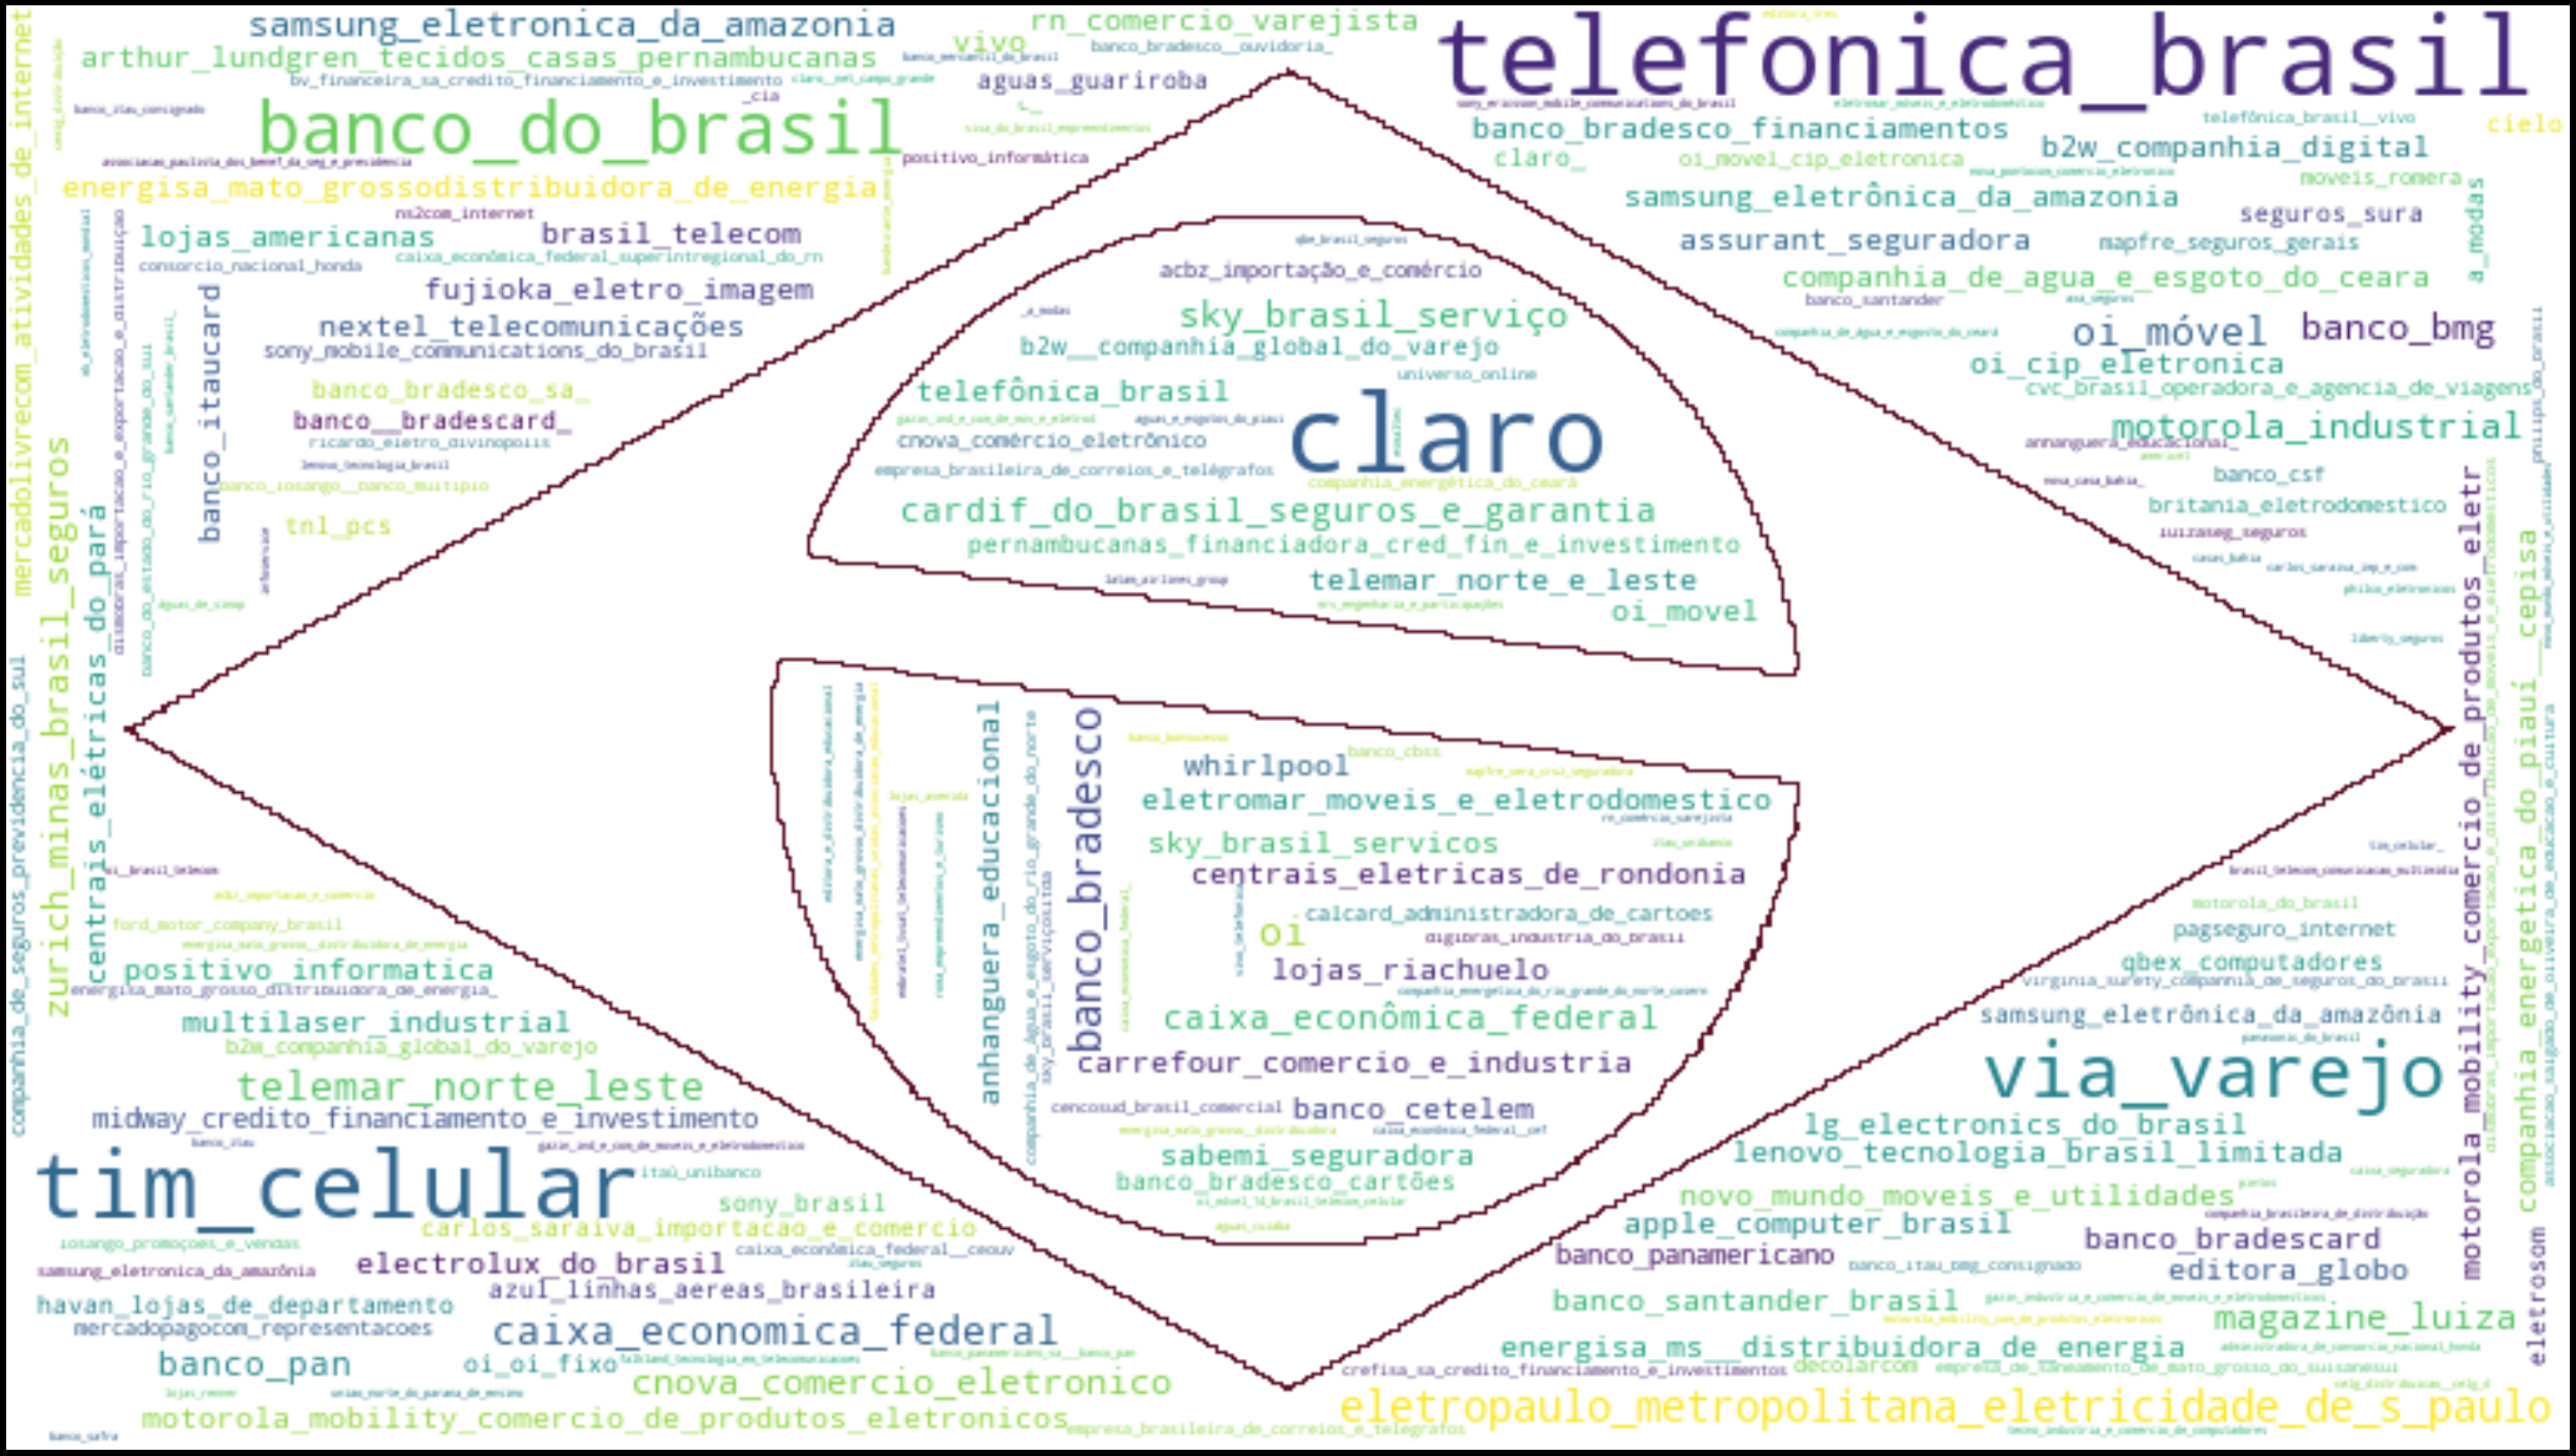

In [ ]:
wordcloud_empresas = WordCloud(background_color="white",collocations=False,
                              width = 3000,
                              height = 3000,
                              max_font_size=1000,
                              max_words=400
                               ,mask=Empresa_mask
                             ,contour_color='#5d0f24'
                             ,contour_width=1
                              ).generate(string_empresas)
plt.figure(figsize = (40,30),
           facecolor = 'k',
           edgecolor = 'k')
plt.imshow(wordcloud_empresas, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("Empresa_wordcloud_40.png")
plt.show()

In [ ]:
data.groupby("empresa").size().sort_values(ascending=False)

empresa
TELEFONICA BRASIL S/A                                 846
CLARO S/A                                             752
ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO     480
TIM CELULAR S/A                                       461
CAIXA ECONOMICA FEDERAL                               419
                                                     ... 
MARFRAN VIAGENS E TURISMO LTDA                          1
MAREZIA COMÉRCIO DE COMBUSTÍVEIS LTDA                   1
MARES - MAPFRE RISCOS ESPECIAIS SEGURADORA S.A.         1
MARE MANSA COMERCIO DE MOVEIS E ELETROS LTDA            1
\tBROTHER INTERNATIONAL CORPORATION DO BRASIL LTDA      1
Length: 11214, dtype: int64

In [ ]:
df_empresa.groupby("empresa").size().sort_values(ascending=False)

empresa
telefonica_brasil                            1150
claro                                        1147
tim_celular                                   788
via_varejo                                    541
banco_do_brasil                               488
                                             ... 
master_construt_incorporad_e_negoci_imobi       1
master_elet_de_briquedos                        1
master_eletronica_de_brinuqedos                 1
master_imbituba_informatica__me                 1
123_viagem_de_turismo                           1
Length: 10353, dtype: int64

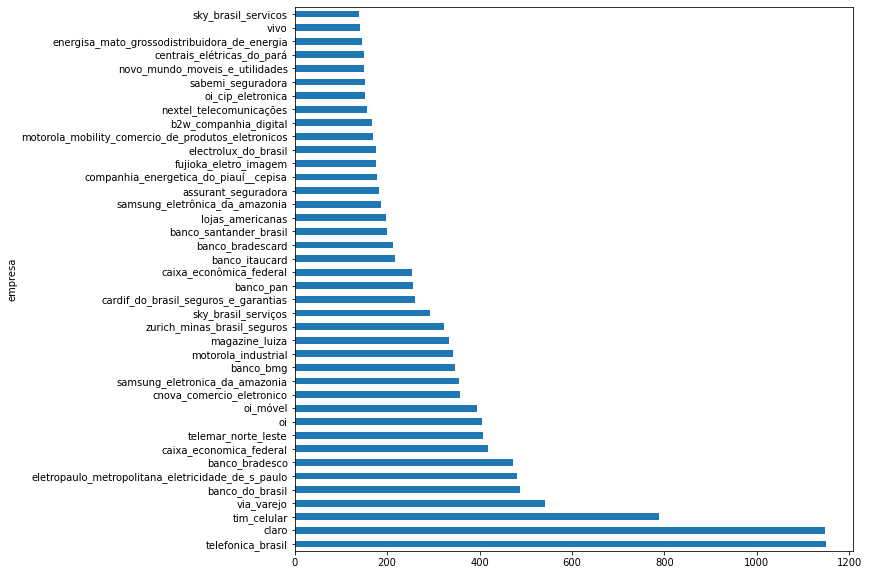

In [ ]:
#Gráfico das 40 empresas com mais reclamações 
df_empresa.groupby('empresa').size().sort_values(ascending=False)[:40].plot(figsize=(10,10),kind='barh')